# 4장 데이터 전처리_countvector

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

## Countvector
리스트를 입력받아야 함

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

In [4]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [5]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [6]:
print(vectorizer.get_feature_names())

print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [7]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [8]:
col = sorted(vectorizer.vocabulary_.items(), key=(lambda x:x[1]), reverse=False)
col
col = [i[0] for i in col]
col

[('and', 0),
 ('document', 1),
 ('first', 2),
 ('is', 3),
 ('one', 4),
 ('second', 5),
 ('the', 6),
 ('third', 7),
 ('this', 8)]

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [9]:
pd.DataFrame(X.toarray(), columns = col)

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [11]:
len(corpus)

4

### 소비자 행태 데이터

In [12]:
tf = pd.read_pickle('../data/df_vect.pkl')
tf.columns
tf.head()
tf.shape

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', 'TV1', 'TV2', 'TV3', 'TV4',
       '드라마1', '드라마2', '드라마3', '구매', '연령대'],
      dtype='object')

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
0,남,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,13.416408,4.0,7.0,9.0,11.0,6.0,9.0,10.0,4.0,1
1,남,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,6.324555,3.0,4.0,7.0,7.0,4.0,6.0,11.0,2.0,1
2,남,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,13.416408,4.0,6.0,7.0,9.0,1.0,4.0,12.0,5.0,1
3,남,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,7.745967,6.0,7.0,9.0,10.0,1.0,4.0,7.0,2.0,1
4,남,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,13.416408,4.0,7.0,9.0,7.0,4.0,5.0,10.0,3.0,1


(3997, 24)

# 1. '드라마' 컬럼 만들기

In [13]:
tf['드라마'] = 0
drama_col = ['드라마1', '드라마2', '드라마3']
drama_genre= tf[drama_col]
drama_genre.head()
drama_genre.shape

,드라마1,드라마2,드라마3
0,6.0,9.0,10.0
1,4.0,6.0,11.0
2,1.0,4.0,12.0
3,1.0,4.0,7.0
4,4.0,5.0,10.0


(3997, 3)

In [14]:
for i, j in drama_genre[0:3].iterrows() :
    (i, j)

(0, 드라마1     6.0
 드라마2     9.0
 드라마3    10.0
 Name: 0, dtype: float64)

(1, 드라마1     4.0
 드라마2     6.0
 드라마3    11.0
 Name: 1, dtype: float64)

(2, 드라마1     1.0
 드라마2     4.0
 드라마3    12.0
 Name: 2, dtype: float64)

## 10을 곱한 이유는 한 자리는 인식을 못함 불용어 처리

In [394]:
for i, j in drama_genre.iterrows() :
    tf['드라마'][i] = [str(int(i)*10) for i in j.values]
tf.head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대,드라마
0,남,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,4.0,7.0,9.0,11.0,6.0,9.0,10.0,4.0,1,"[60, 90, 100]"
1,남,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,3.0,4.0,7.0,7.0,4.0,6.0,11.0,2.0,1,"[40, 60, 110]"
2,남,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,4.0,6.0,7.0,9.0,1.0,4.0,12.0,5.0,1,"[10, 40, 120]"
3,남,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,6.0,7.0,9.0,10.0,1.0,4.0,7.0,2.0,1,"[10, 40, 70]"
4,남,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,4.0,7.0,9.0,7.0,4.0,5.0,10.0,3.0,1,"[40, 50, 100]"


In [395]:
' '.join(tf['드라마'][0])

'60 90 100'

In [396]:
corpus = []

for i in tf['드라마']:
    corpus.append(' '.join(i))
    
len(corpus)
corpus[0:10]

3997

['60 90 100',
 '40 60 110',
 '10 40 120',
 '10 40 70',
 '40 50 100',
 '10 40 70',
 '10 40 70',
 '10 40 70',
 '10 40 70',
 '10 40 70']

In [397]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [398]:
X = vect.fit_transform(corpus)
X
X.toarray()

<3997x16 sparse matrix of type '<class 'numpy.int64'>'
	with 11829 stored elements in Compressed Sparse Row format>

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [399]:
X.sum(0)

matrix([[2759,  103,  191,   74,  131,  178,   32,    3,  684,  544,
         3157,  578,  332, 2424,  484,  317]], dtype=int64)

### key는 단어이고 value는 array index

In [400]:
for key, value in vect.vocabulary_.items():
    print(f'key = {key}, value={value}') 

key = 60, value=12
key = 90, value=15
key = 100, value=1
key = 40, value=10
key = 110, value=2
key = 10, value=0
key = 120, value=3
key = 70, value=13
key = 50, value=11
key = 80, value=14
key = 130, value=4
key = 20, value=8
key = 30, value=9
key = 140, value=5
key = 150, value=6
key = 160, value=7


In [401]:
cols = sorted(vect.vocabulary_.items(), key=(lambda x:x[1]), reverse=False)
cols

[('10', 0),
 ('100', 1),
 ('110', 2),
 ('120', 3),
 ('130', 4),
 ('140', 5),
 ('150', 6),
 ('160', 7),
 ('20', 8),
 ('30', 9),
 ('40', 10),
 ('50', 11),
 ('60', 12),
 ('70', 13),
 ('80', 14),
 ('90', 15)]

In [402]:
[i for i in cols]

[('10', 0),
 ('100', 1),
 ('110', 2),
 ('120', 3),
 ('130', 4),
 ('140', 5),
 ('150', 6),
 ('160', 7),
 ('20', 8),
 ('30', 9),
 ('40', 10),
 ('50', 11),
 ('60', 12),
 ('70', 13),
 ('80', 14),
 ('90', 15)]

In [403]:
cols = ['drama' + str(int(int(i[0])/10)) for i in cols]
','.join(cols)

'drama1,drama10,drama11,drama12,drama13,drama14,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9'

In [404]:
drama = pd.DataFrame(X.toarray(), columns =cols)
drama

,drama1,drama10,drama11,drama12,drama13,drama14,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3993,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3994,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3995,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [405]:
drama['drama6'].sum()

332

In [406]:
tf.columns

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', 'TV1', 'TV2', 'TV3', 'TV4',
       '드라마1', '드라마2', '드라마3', '구매', '연령대', '드라마'],
      dtype='object')

In [407]:
tf = pd.merge(tf.drop(['드라마','드라마1', '드라마2', '드라마3'], axis=1), drama, left_index=True, right_index=True, how='left')
tf
tf.columns

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9
0,남,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,1
1,남,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0,0,0,0,1,0,1,0,0,0
2,남,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,0,0,0,0,1,0,0,0,0,0
3,남,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,0,0,0,0,1,0,0,1,0,0
4,남,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,여,58.0,광주전라제주,기능노무직,1.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,0,0,0,0,1,0,0,0,1,0
3993,여,63.0,광주전라제주,전업주부,7.0,고등학교졸업,자가,기혼,2.0,60.689964,...,0,0,0,0,1,0,0,1,0,0
3994,여,61.0,광주전라제주,기능노무직,4.0,중학교졸업,전세,기혼,1.0,60.689964,...,0,0,0,0,1,1,0,0,0,0
3995,여,67.0,광주전라제주,기능노무직,2.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,0,0,0,0,1,0,0,1,0,0


Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', 'TV1', 'TV2', 'TV3', 'TV4',
       '구매', '연령대', 'drama1', 'drama10', 'drama11', 'drama12', 'drama13',
       'drama14', 'drama15', 'drama16', 'drama2', 'drama3', 'drama4', 'drama5',
       'drama6', 'drama7', 'drama8', 'drama9'],
      dtype='object')

# 2. 'TV' 컬럼 만들기

In [408]:
tf.columns

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', 'TV1', 'TV2', 'TV3', 'TV4',
       '구매', '연령대', 'drama1', 'drama10', 'drama11', 'drama12', 'drama13',
       'drama14', 'drama15', 'drama16', 'drama2', 'drama3', 'drama4', 'drama5',
       'drama6', 'drama7', 'drama8', 'drama9'],
      dtype='object')

In [409]:
tf['tv'] = 0
tv_col = ['TV1', 'TV2', 'TV3', 'TV4']
tv_genre= tf[tv_col]
tv_genre.head()
tv_genre.shape

,TV1,TV2,TV3,TV4
0,4.0,7.0,9.0,11.0
1,3.0,4.0,7.0,7.0
2,4.0,6.0,7.0,9.0
3,6.0,7.0,9.0,10.0
4,4.0,7.0,9.0,7.0


(3997, 4)

## 10을 곱한 이유는 한 자리는 인식을 못함 불용어 처리

In [410]:
for i, j in tv_genre.iterrows() :
    tf['tv'][i] = [str(int(i)*10) for i in j.values]
tf.head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9,tv
0,남,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,"[40, 70, 90, 110]"
1,남,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0,0,0,1,0,1,0,0,0,"[30, 40, 70, 70]"
2,남,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,0,0,0,1,0,0,0,0,0,"[40, 60, 70, 90]"
3,남,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,0,0,0,1,0,0,1,0,0,"[60, 70, 90, 100]"
4,남,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,"[40, 70, 90, 70]"


In [411]:
corpus = []

for i in tf['tv']:
    corpus.append(' '.join(i))
    
len(corpus)

3997

In [412]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)
X.toarray()

array([[0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 2, 0, 0]], dtype=int64)

### key는 단어이고 value는 array index

In [413]:
cols = sorted(vect.vocabulary_.items(), key=(lambda x:x[1]), reverse=False)

cols = ['tv' + str(int(int(i[0])/10)) for i in cols]
','.join(cols)

'tv1,tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17,tv2,tv3,tv4,tv5,tv6,tv7,tv8,tv9'

In [414]:
tv = pd.DataFrame(X.toarray(), columns =cols)
tv

,tv1,tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17,tv2,tv3,tv4,tv5,tv6,tv7,tv8,tv9
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
3993,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0
3994,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3995,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0


In [415]:
tf.columns

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', 'TV1', 'TV2', 'TV3', 'TV4',
       '구매', '연령대', 'drama1', 'drama10', 'drama11', 'drama12', 'drama13',
       'drama14', 'drama15', 'drama16', 'drama2', 'drama3', 'drama4', 'drama5',
       'drama6', 'drama7', 'drama8', 'drama9', 'tv'],
      dtype='object')

In [416]:
tf = pd.merge(tf.drop(['tv', 'TV1', 'TV2', 'TV3', 'TV4'], axis=1), tv, left_index=True, right_index=True, how='left')
tf
tf.columns

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,tv16,tv17,tv2,tv3,tv4,tv5,tv6,tv7,tv8,tv9
0,남,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,0,0,0,0,1,0,0,1,0,1
1,남,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0,0,0,1,1,0,0,2,0,0
2,남,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,0,0,0,0,1,0,1,1,0,1
3,남,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,0,0,0,0,0,0,1,1,0,1
4,남,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,0,0,0,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,여,58.0,광주전라제주,기능노무직,1.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,0,0,1,1,1,0,0,0,0,0
3993,여,63.0,광주전라제주,전업주부,7.0,고등학교졸업,자가,기혼,2.0,60.689964,...,0,0,0,0,1,0,1,2,0,0
3994,여,61.0,광주전라제주,기능노무직,4.0,중학교졸업,전세,기혼,1.0,60.689964,...,0,0,0,0,1,0,1,1,0,0
3995,여,67.0,광주전라제주,기능노무직,2.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,0,0,0,0,1,0,0,2,0,0


Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', '구매', '연령대', 'drama1',
       'drama10', 'drama11', 'drama12', 'drama13', 'drama14', 'drama15',
       'drama16', 'drama2', 'drama3', 'drama4', 'drama5', 'drama6', 'drama7',
       'drama8', 'drama9', 'tv1', 'tv10', 'tv11', 'tv12', 'tv13', 'tv14',
       'tv15', 'tv16', 'tv17', 'tv2', 'tv3', 'tv4', 'tv5', 'tv6', 'tv7', 'tv8',
       'tv9'],
      dtype='object')

In [417]:
tf.columns

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', '구매', '연령대', 'drama1',
       'drama10', 'drama11', 'drama12', 'drama13', 'drama14', 'drama15',
       'drama16', 'drama2', 'drama3', 'drama4', 'drama5', 'drama6', 'drama7',
       'drama8', 'drama9', 'tv1', 'tv10', 'tv11', 'tv12', 'tv13', 'tv14',
       'tv15', 'tv16', 'tv17', 'tv2', 'tv3', 'tv4', 'tv5', 'tv6', 'tv7', 'tv8',
       'tv9'],
      dtype='object')

In [418]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [419]:
summary(tf)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
성별,category,3997,0,2
연령,float64,3997,0,57
지역,category,3997,0,7
직업,category,3997,0,7
가구소득,float64,3997,0,11
학력,category,3997,0,12
주거형태,category,3997,0,5
결혼,category,3997,0,3
자녀수,float64,3997,0,4
인터넷평일,float64,3997,0,28


## 구매선호도 경중으로 실습데이터 나누기
#### 구매여부로 이진분류 데이터 생성
종속변수 정리하기

In [420]:
print('nan, inf & -inf 의 개수는 ?  ', tf.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


In [421]:
tf['구매'].value_counts(normalize=True)

3.0    0.379284
4.0    0.244183
2.0    0.215161
5.0    0.089817
1.0    0.058544
6.0    0.013010
Name: 구매, dtype: float64

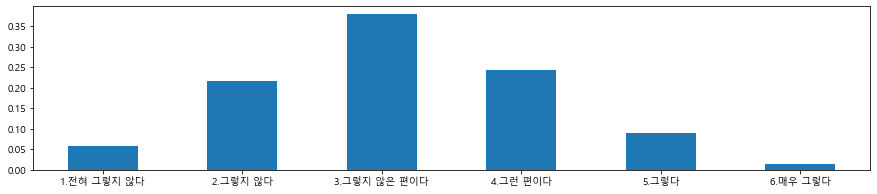

In [422]:
map_dict={1:'1.전혀 그렇지 않다', 2:'2.그렇지 않다', 3:'3.그렇지 않은 편이다',
          4:'4.그런 편이다', 5:'5.그렇다', 6:'6.매우 그렇다'}
tf['구매'].value_counts(normalize=True).rename(index=map_dict).sort_index().plot(kind='bar', rot='360', figsize=(15,3))

### 구매비율 34%

In [423]:
sf = df.copy()

sf['구매의향'] = 0
buy = sf[((sf['구매'] == 4) | (sf['구매'] == 5) | (sf['구매'] == 6))].index
sf.loc[buy, '구매의향'] = 1
del sf['구매']

sf = sf.rename(columns={'구매의향': '구매'})
print('구매비율 {:0.2f}%'.format(sf['구매'].value_counts()[1]/len(sf)*100))
sf.to_pickle('../data/consumer_34.pkl')

구매비율 34.70%


### 구매비율 10%

In [424]:
sf = df.copy()

sf['구매의향'] = 0
buy = sf[((sf['구매'] == 5) | (sf['구매'] == 6))].index
sf.loc[buy, '구매의향'] = 1
del sf['구매']

sf = sf.rename(columns={'구매의향': '구매'})
print('구매비율 {:0.2f}%'.format(sf['구매'].value_counts()[1]/len(sf)*100))
sf.to_pickle('../data/consumer_10.pkl')

구매비율 10.28%


# End